# Visualizing the Franke function
In this notebook, we are going to make some plots of the Franke function with and without added noise. Visualization is of course an important part of the data science process: If we are to succeed in building a model that approximates some data, we need a clear picture of what the data looks like.

In [1]:
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df_X = pd.read_csv('../data/generated/X.csv')
df_X.head()

,Unnamed: 0,1,x,y,x*x,x*y,y*y,x*x*x,x*x*y,x*y*y,...,x*x*x*y,x*x*y*y,x*y*y*y,y*y*y*y,x*x*x*x*x,x*x*x*x*y,x*x*x*y*y,x*x*y*y*y,x*y*y*y*y,y*y*y*y*y
0,0,1.0,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0.05,0.0,0.0025,0.0,0.0,0.000125,0.0,0.0,...,0.0,0.0,0.0,0.0,3.125000e-07,0.0,0.0,0.0,0.0,0.0
2,2,1.0,0.10,0.0,0.0100,0.0,0.0,0.001000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000e-05,0.0,0.0,0.0,0.0,0.0
3,3,1.0,0.15,0.0,0.0225,0.0,0.0,0.003375,0.0,0.0,...,0.0,0.0,0.0,0.0,7.593750e-05,0.0,0.0,0.0,0.0,0.0
4,4,1.0,0.20,0.0,0.0400,0.0,0.0,0.008000,0.0,0.0,...,0.0,0.0,0.0,0.0,3.200000e-04,0.0,0.0,0.0,0.0,0.0


In [3]:
df_X = pd.read_csv('../data/generated/X.csv')
x = np.array(df_X[['x']]).reshape((20, 20))
y = np.array(df_X[['y']]).reshape((20, 20))
df_z_no_noise = pd.read_csv('../data/generated/no_noise.csv')
df_z_some_noise = pd.read_csv('../data/generated/some_noise.csv')
df_z_noisy = pd.read_csv('../data/generated/noisy.csv')
z_no_noise = np.array(df_z_no_noise['0']).reshape((20, 20))
z_some_noise = np.array(df_z_some_noise['0']).reshape((20, 20))
z_noisy = np.array(df_z_noisy['0']).reshape((20, 20))

# Some basic properties of the Franke Function
In order to have some understanding of the Franke function with or without added noise, we use the $\texttt{describe}$ method from $\texttt{pandas}$ to generate the following table. We also store the results in a csv file.

In [4]:
df_z = pd.concat([df_z_no_noise['0'], df_z_some_noise['0'], df_z_noisy['0']], axis=1)
df_z.columns = ['No noise', 'Some noise (sigma 0.1)', 'Noisy (sigma 0.9)']
description = df_z.describe()
description.to_csv('../reports/csv_files/1_description_table.csv')
description

,No noise,Some noise (sigma 0.1),Noisy (sigma 0.9)
count,400.000000,400.000000,400.000000
mean,0.427824,0.426838,0.418956
std,0.277106,0.297017,0.944313
min,0.044995,-0.132859,-2.372541
25%,0.229276,0.213977,-0.256148
50%,0.350001,0.370047,0.452423
75%,0.566714,0.586232,1.003664
max,1.218458,1.370103,3.092411


## Surface plots

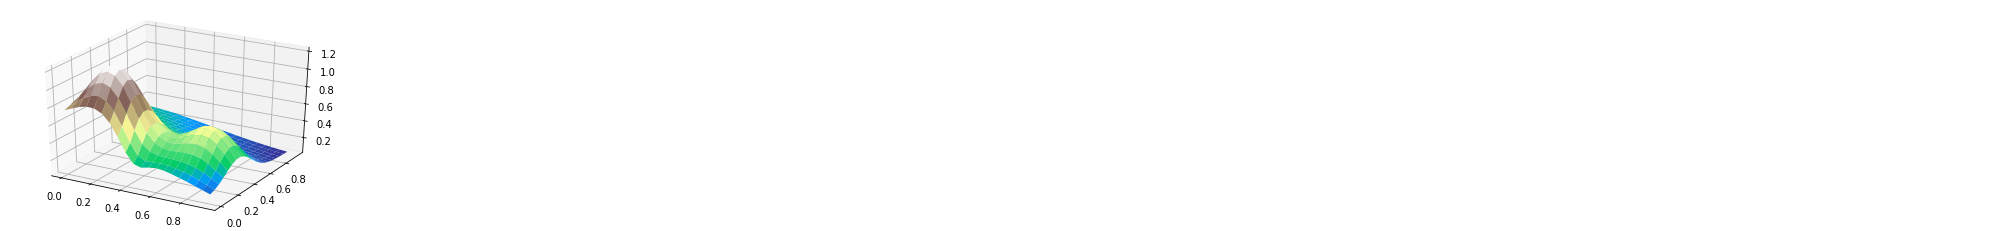

In [5]:
# Will I be using this?
fig = plt.figure()

ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z_no_noise, cmap='terrain')

plt.savefig('../reports/figures/1_surface_plot_no_noise.png')
plt.show()

## Contour plots

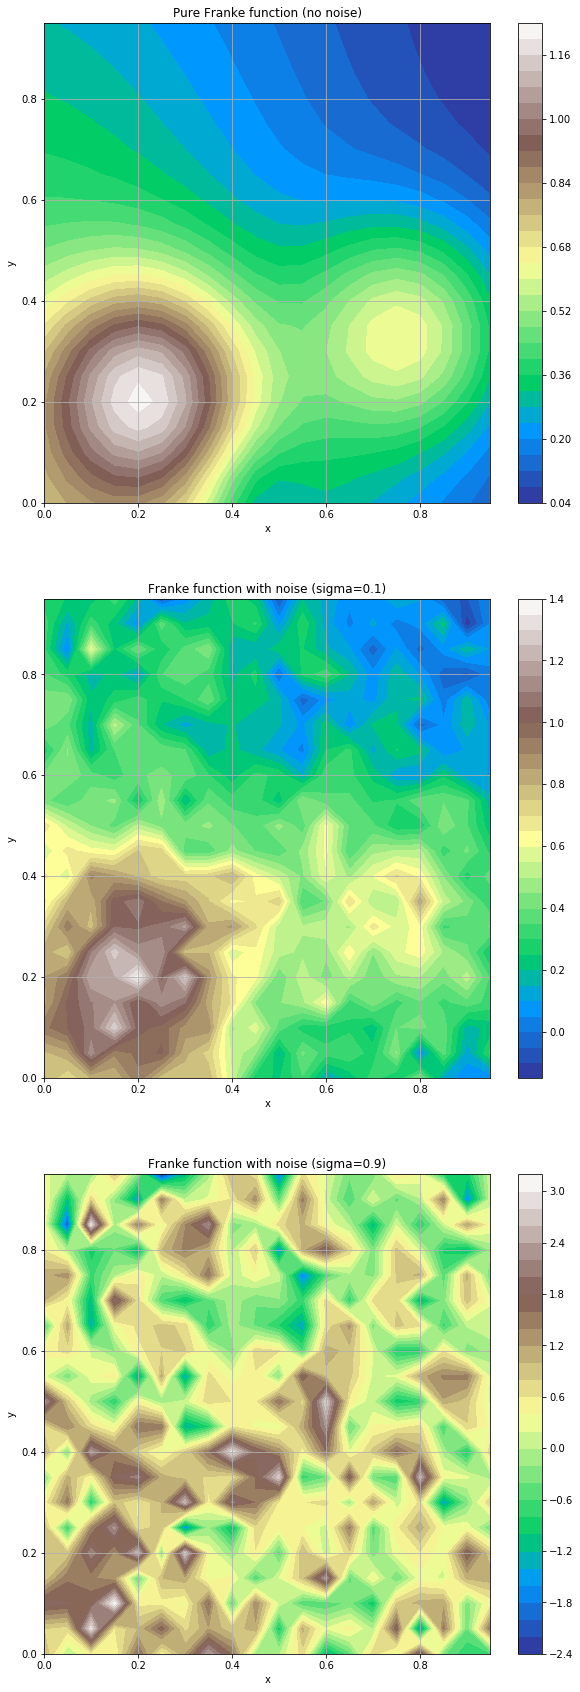

In [52]:
plt.figure(figsize=(10, 30))
plt.subplot(311)
plt.title('Pure Franke function (no noise)')
plt.contourf(x, y, z_no_noise, cmap = 'terrain', levels=30)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.grid(True)
plt.subplot(312)
plt.title('Franke function with noise (sigma=0.1)')
plt.contourf(x, y, z_some_noise, cmap = 'terrain', levels=30)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.grid(True)
plt.subplot(313)
plt.title('Franke function with noise (sigma=0.9)')
plt.contourf(x, y, z_noisy, cmap = 'terrain', levels=30)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.grid(True)
plt.show()

## Saving contour plots to file

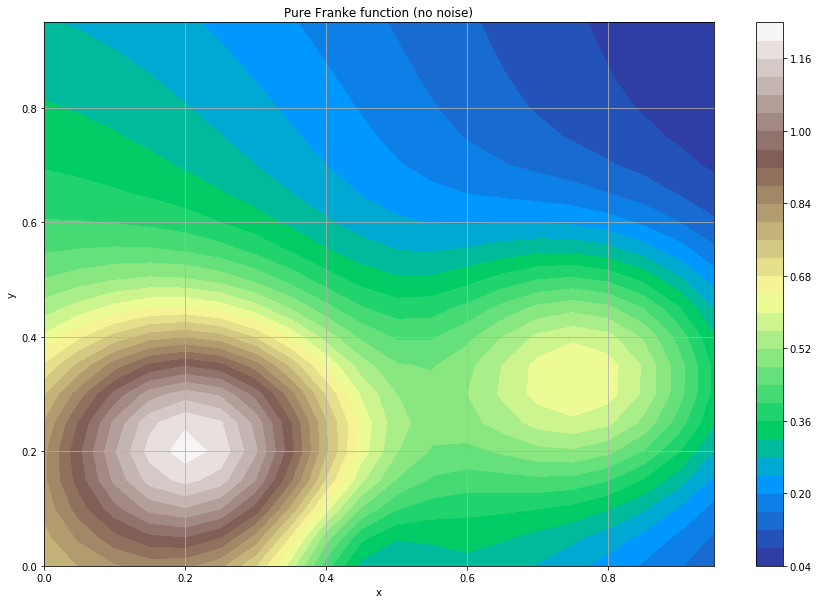

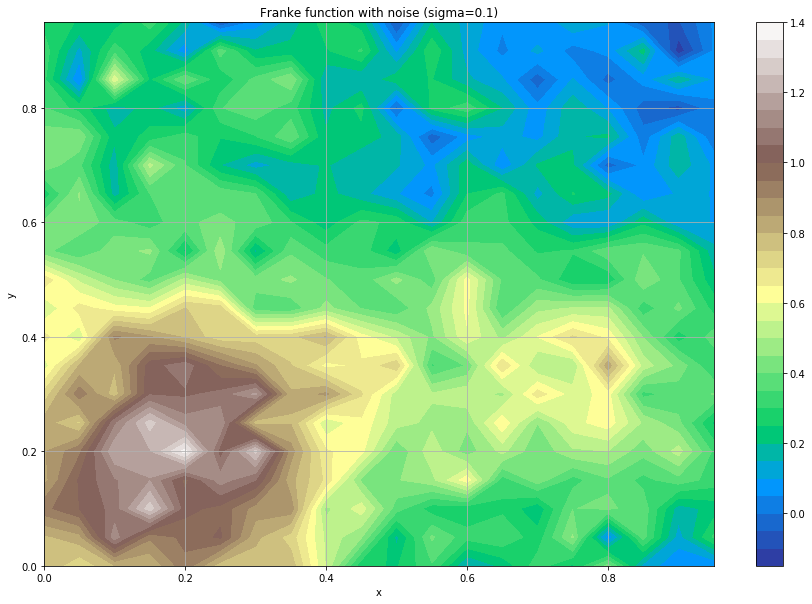

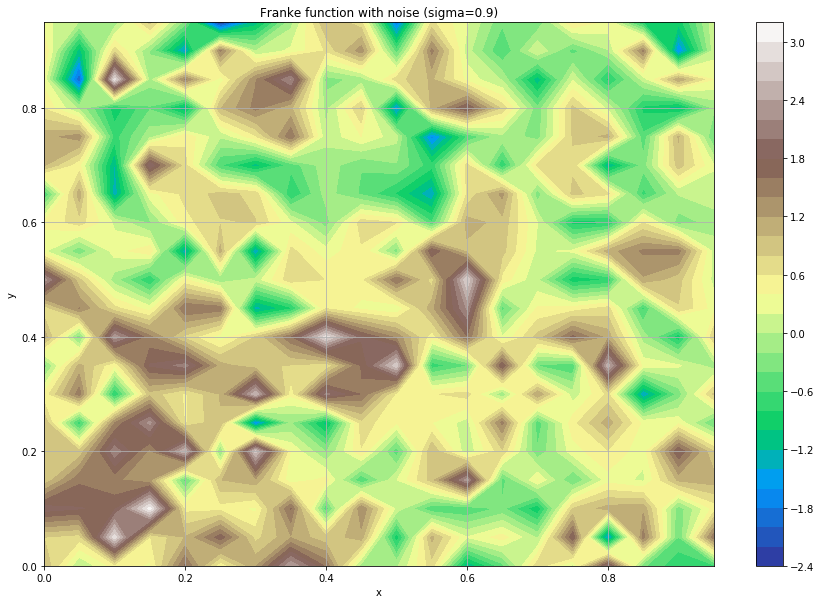

In [6]:
plt.figure(figsize=(15, 10))
plt.title('Pure Franke function (no noise)')
plt.contourf(x, y, z_no_noise, cmap = 'terrain', levels=30)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.grid(True)
plt.savefig('../reports/figures/1_franke_contour_no_noise.png')

plt.figure(figsize=(15, 10))
plt.title('Franke function with noise (sigma=0.1)')
plt.contourf(x, y, z_some_noise, cmap = 'terrain', levels=30)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.grid(True)
plt.savefig('../reports/figures/1_franke_contour_some_noise.png')

plt.figure(figsize=(15, 10))
plt.title('Franke function with noise (sigma=0.9)')
plt.contourf(x, y, z_noisy, cmap = 'terrain', levels=30)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.grid(True)
plt.savefig('../reports/figures/1_franke_contour_noisy.png')

plt.show()